# 🏘️💵CatBoost Insurance Regression

Welcome to this notebook!

In this dataset, each row is an event, and each column is a feature of that event. But you'll see that the column names got anonymized by the owner to protect their data. Which is not an issue for us.

what we're gonna cover:
* Installing CatBoost
* Importing libraries, train and test data
* Grab the categorical parts of the data using Regular Expression
* Check the target distribution
* Create the model
* Train test Split
* Fit the data into the model
* Conclusion
* Saving the model
* Predict on the test dataset
* Create `loss` column in the test dataset and save it

## Installing CatBoost



In [1]:
!pip install -U catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


## Importing libraries, train and test data

In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [3]:
data_train = pd.read_csv('drive/MyDrive/CatBoost/train.csv')
data_test = pd.read_csv('drive/MyDrive/CatBoost/test.csv')

In [4]:
data_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


## Grab the categorical parts of the data using Regular Expression

We want to grab the index of the categorical columns in order to give it to CatBoost to One Hot Encode it. Yes!!! one of the best benefits of CatBoost is that it would OHE with no need of any other third-party library.

Thats why we use RE (regular expression)

In [5]:
cat_pattern = re.compile("^cat([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$") #cat60
cont_pattern = re.compile("^cont([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$") #cont2
cat_col = sorted([cat for cat in data_train.columns if 'cat' in cat], key=lambda s: int(s[3:]))
cat_col

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [6]:
cat_index = [i for i in range(0, len(data_train.columns)) if cat_pattern.match(data_train.columns[i])]
cat_index

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116]

## Check the target distribution

<ipython-input-8-aba83e559765>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['loss']);


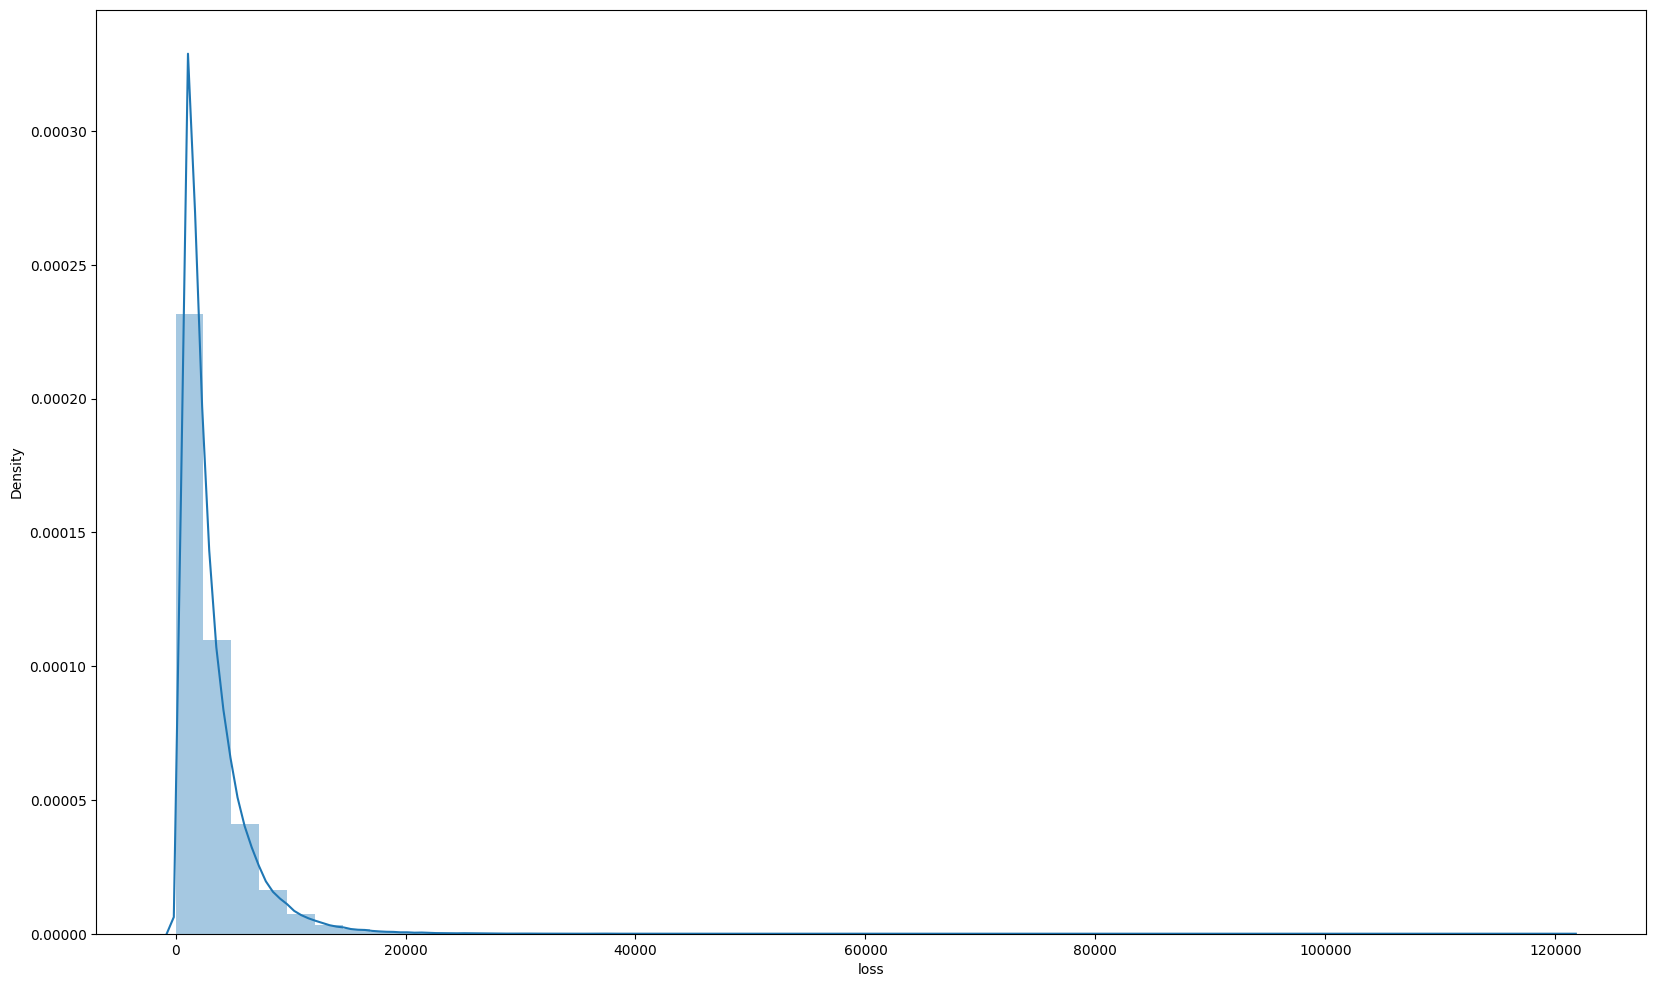

In [8]:
plt.figure(figsize=(20, 12))
sns.distplot(data_train['loss']);

As you can see, we are facing with Unbalaced data. And that, is a problem for our model and it's algorithm.... Because it may get biased.

To encounter this issue we caan use the `log()` and `sqrt()` functions.

**Be Careful:** You should keep that in mind that when you use above functions, you should call their reverse function at the end to see the actual results properly. like using `exp()` and `**2`.



<ipython-input-9-9dbfe90c1154>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_train['loss']))


<Axes: xlabel='loss', ylabel='Density'>

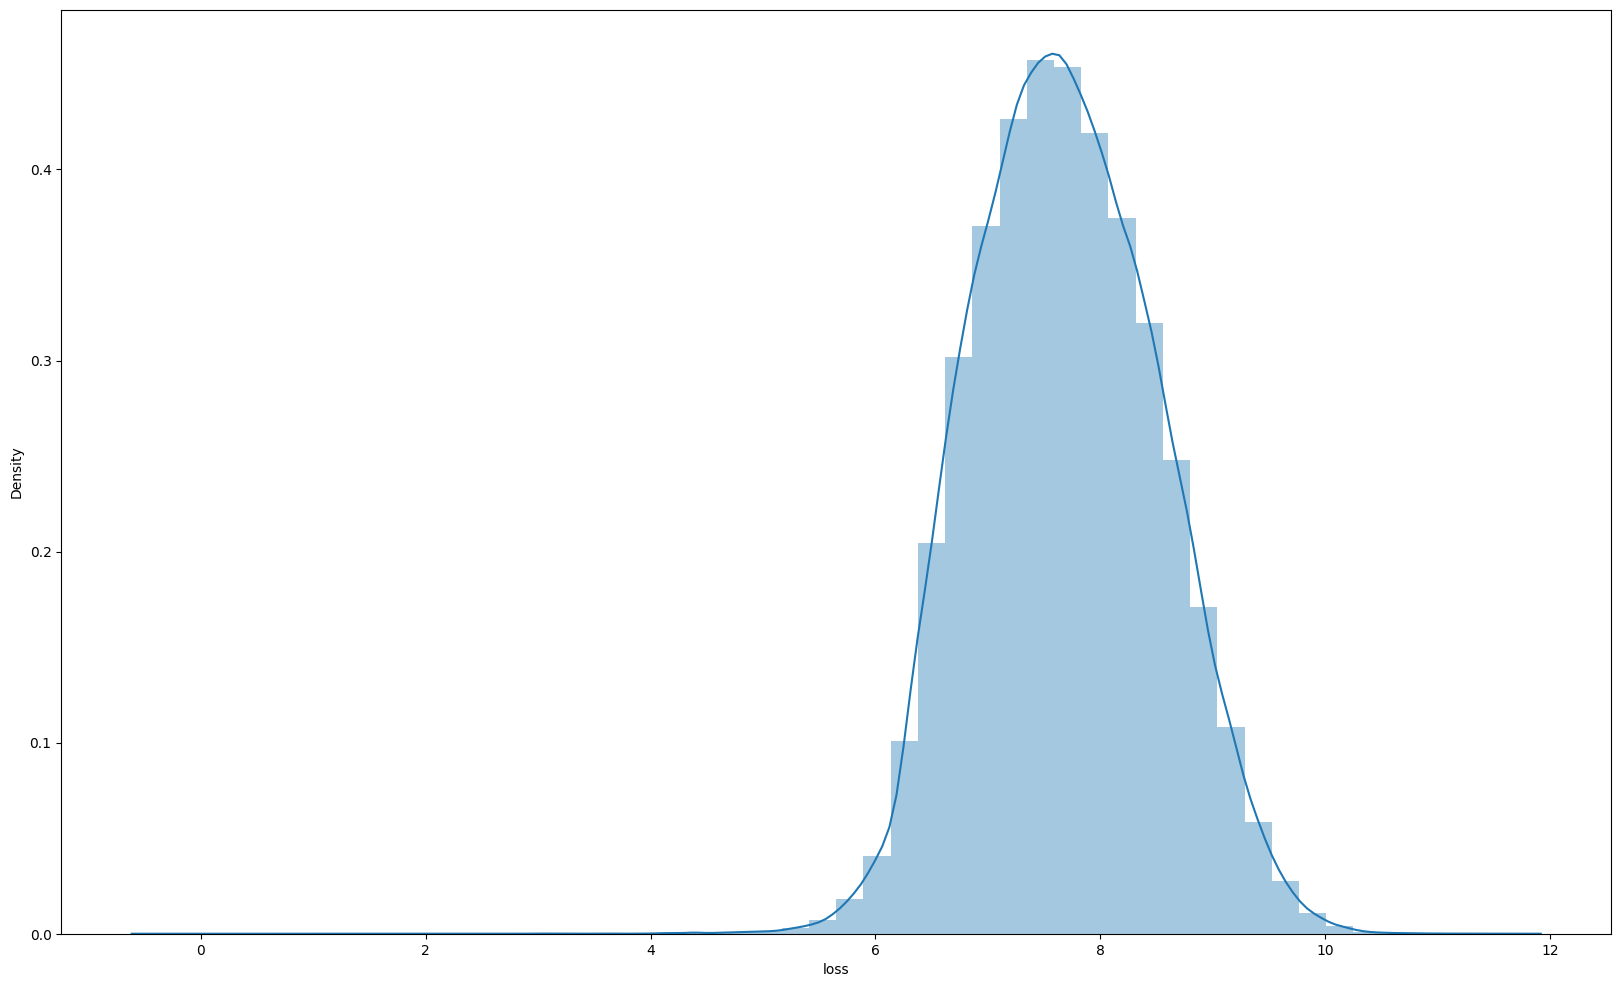

In [9]:
plt.figure(figsize=(20, 12))
sns.distplot(np.log(data_train['loss']))

## Create the model

In [10]:
model = CatBoostRegressor(iterations=120, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10)

## Train test split

In [11]:
X = data_train.drop(['id', 'loss'], axis=1)
y = np.log(data_train['loss'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Fit the data into the model

In [12]:
model.fit(X_train, y_train, np.asarray(cat_index) - 1, eval_set=(X_test, y_test))

0:	learn: 0.6482573	test: 0.6475034	best: 0.6475034 (0)	total: 485ms	remaining: 57.7s
10:	learn: 0.5631299	test: 0.5628336	best: 0.5628336 (10)	total: 3.32s	remaining: 32.9s
20:	learn: 0.5183663	test: 0.5180343	best: 0.5180343 (20)	total: 7.04s	remaining: 33.2s
30:	learn: 0.4922893	test: 0.4919353	best: 0.4919353 (30)	total: 10.7s	remaining: 30.7s
40:	learn: 0.4766379	test: 0.4763152	best: 0.4763152 (40)	total: 13.3s	remaining: 25.7s
50:	learn: 0.4652158	test: 0.4650172	best: 0.4650172 (50)	total: 15.9s	remaining: 21.6s
60:	learn: 0.4572987	test: 0.4572786	best: 0.4572786 (60)	total: 18.6s	remaining: 18s
70:	learn: 0.4518099	test: 0.4519823	best: 0.4519823 (70)	total: 22.8s	remaining: 15.7s
80:	learn: 0.4473272	test: 0.4474604	best: 0.4474604 (80)	total: 26s	remaining: 12.5s
90:	learn: 0.4440780	test: 0.4442485	best: 0.4442485 (90)	total: 28.7s	remaining: 9.14s
100:	learn: 0.4412347	test: 0.4414608	best: 0.4414608 (100)	total: 31.3s	remaining: 5.88s
110:	learn: 0.4391792	test: 0.439440

Mean absolute error is `0.4377625038`. But what does it mean?

As you remember, we used `.log()`. So this difference between y_true and y_preds is difference of logarithms.

It means that this number is average difference of logarithms

So we should use `.exp()` to see the actual result.

In [13]:
np.exp(0.4377625038)

1.549236925841338

## Conclusion

So our model can predict the loss with error of ± $1.5 which is a really nice and low error number!!!

Why is it acting so good you might ask?!

Well:
1. we had a huge number of samples
2. 132 columns!
3. We used a powerful model
4. target had a normal distribution during training

## Saving the model

In [14]:
model.save_model('drive/MyDrive/CatBoost/catboost_reg.h5')

## Predict on the test dataset

In [15]:
data_test.drop(['id'], axis=1, inplace=True)

In [16]:
model.predict(data_test)

array([7.41338226, 7.62722337, 9.03889073, ..., 7.72611256, 6.83859921,
       8.2750494 ])

In [17]:
np.exp(model.predict(data_test))

array([1658.02474427, 2053.34072534, 8424.42689662, ..., 2266.77310103,
        933.18103003, 3924.71652388])

## Create `loss` column in the test dataset and save it

In [18]:
data_test['loss'] = np.exp(model.predict(data_test))

In [19]:
data_test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,A,A,A,A,A,B,A,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,1658.024744
1,A,B,A,B,A,A,A,A,B,A,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,2053.340725
2,A,B,A,B,B,A,B,A,B,B,...,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,8424.426897
3,A,A,A,A,B,A,A,A,A,A,...,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,4698.713366
4,B,A,A,A,A,B,A,A,A,A,...,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,960.695285


In [20]:
data_test.to_excel('drive/MyDrive/CatBoost/prediction001.xlsx')

<div style=" padding: 40px; text-align: left; color: #535453;">
    Notebook by:
    <h2 style="font-family: 'calibri', sans-serif;ext-align: center;  font-size: 50px; margin-top: 0; margin-bottom: 20px;">
    Elyas Najafi
    </h2>
</div>